In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
os.listdir(r"/Users/aruzhanakbayeva/Desktop/new projects/uber/uber_dataset")

['other-Lyft_B02510.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Skyline_B00111.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-janjune-15.csv',
 'other-American_B01362.csv',
 'uber-raw-data-apr14.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-Highclass_B01717.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-jun14.csv',
 'other-Carmel_B00256.csv',
 'other-Diplo_B01196.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-may14.csv',
 'other-Prestige_B01338.csv']

In [4]:
uber_15 = pd.read_csv(r"/Users/aruzhanakbayeva/Desktop/new projects/uber/uber_dataset/uber-raw-data-janjune-15_sample.csv")
uber_15

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140
...,...,...,...,...
99995,B02764,2015-04-13 16:12:00,B02764,234
99996,B02764,2015-03-06 21:32:00,B02764,24
99997,B02598,2015-03-19 19:56:00,B02598,17
99998,B02682,2015-05-02 16:02:00,B02682,68


# Data wrangling

In [5]:
uber_15.shape

(100000, 4)

In [6]:
type(uber_15)

pandas.core.frame.DataFrame

In [7]:
uber_15.duplicated().sum()

54

In [8]:
uber_15.drop_duplicates(inplace=True)

In [9]:
uber_15.shape

(99946, 4)

In [10]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [11]:
uber_15.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [12]:
uber_15["Pickup_date"][0]

'2015-05-02 21:43:00'

In [13]:
type(uber_15["Pickup_date"][0])

str

In [14]:
uber_15["Pickup_date"] = pd.to_datetime(uber_15["Pickup_date"])

In [15]:
uber_15["Pickup_date"].dtype

dtype('<M8[ns]')

In [16]:
uber_15["Pickup_date"]

0       2015-05-02 21:43:00
1       2015-01-20 19:52:59
2       2015-03-19 20:26:00
3       2015-04-10 17:38:00
4       2015-03-23 07:03:00
                ...        
99995   2015-04-13 16:12:00
99996   2015-03-06 21:32:00
99997   2015-03-19 19:56:00
99998   2015-05-02 16:02:00
99999   2015-06-24 16:04:00
Name: Pickup_date, Length: 99946, dtype: datetime64[ns]

In [17]:
type(uber_15["Pickup_date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
uber_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

# Finding the month with highest sale

In [19]:
uber_15

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140
...,...,...,...,...
99995,B02764,2015-04-13 16:12:00,B02764,234
99996,B02764,2015-03-06 21:32:00,B02764,24
99997,B02598,2015-03-19 19:56:00,B02598,17
99998,B02682,2015-05-02 16:02:00,B02682,68


In [20]:
uber_15['month'] = uber_15['Pickup_date'].dt.month_name()
uber_15

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month
0,B02617,2015-05-02 21:43:00,B02764,237,May
1,B02682,2015-01-20 19:52:59,B02682,231,January
2,B02617,2015-03-19 20:26:00,B02617,161,March
3,B02764,2015-04-10 17:38:00,B02764,107,April
4,B02764,2015-03-23 07:03:00,B00111,140,March
...,...,...,...,...,...
99995,B02764,2015-04-13 16:12:00,B02764,234,April
99996,B02764,2015-03-06 21:32:00,B02764,24,March
99997,B02598,2015-03-19 19:56:00,B02598,17,March
99998,B02682,2015-05-02 16:02:00,B02682,68,May


<Axes: xlabel='month'>

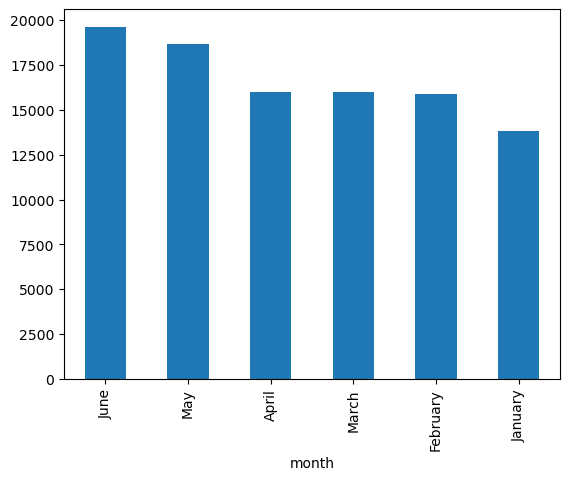

In [21]:
uber_15['month'].value_counts().plot(kind="bar")

In [26]:
uber_15['weekday'] = uber_15['Pickup_date'].dt.day_name()
uber_15['day'] = uber_15['Pickup_date'].dt.day
uber_15['hour'] = uber_15['Pickup_date'].dt.hour
uber_15['minute'] = uber_15['Pickup_date'].dt.minute

In [28]:
uber_15.head(5)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,2,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,20,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,19,20,26
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,10,17,38
4,B02764,2015-03-23 07:03:00,B00111,140,March,Monday,23,7,3


In [29]:
pivot = pd.crosstab(index=uber_15['month'], columns = uber_15['weekday'])
pivot

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2655,1970,2550,2183,2396,2129,2013
January,2508,1353,2745,1651,2378,1444,1740
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


<Axes: xlabel='month'>

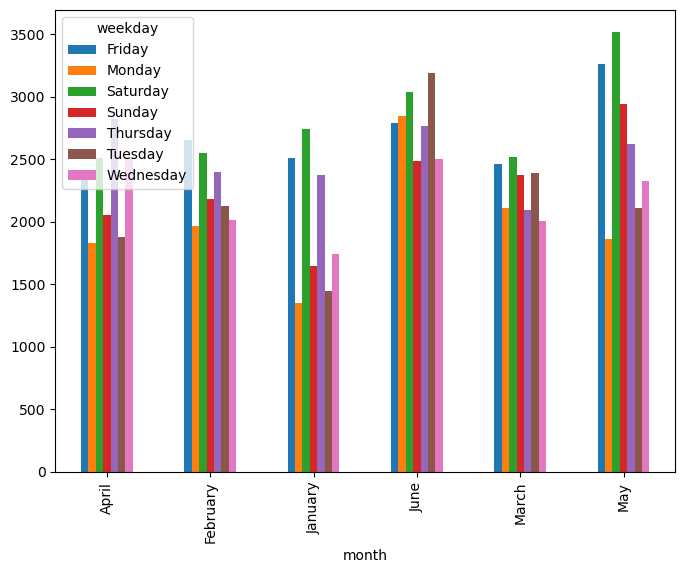

In [31]:
pivot.plot(kind='bar', figsize=(8,6))